In [ ]:
# colab 환경에서 학습 진행

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!ls -la "/content/gdrive/My Drive/darknet"

total 40
drwx------ 2 root root 4096 Aug  4 12:39 backup
drwx------ 2 root root 4096 Aug  6 03:30 backup_z
drwx------ 2 root root 4096 Aug  3 14:57 bin
drwx------ 2 root root 4096 Aug  3 15:29 cfg
drwx------ 2 root root 4096 Aug  3 13:05 cuDNN
drwx------ 2 root root 4096 Aug  5 03:38 custom
drwx------ 2 root root 4096 Aug  6 03:48 custom_z
drwx------ 2 root root 4096 Aug  3 15:29 data
drwx------ 2 root root 4096 Aug  3 14:58 weights
drwx------ 2 root root 4096 Aug  7 09:32 zucchini_yolo


In [ ]:
!ls -la /usr/local/cuda/include/cudnn.h

ls: cannot access '/usr/local/cuda/include/cudnn.h': No such file or directory


# Install CUDA related modules, cuDNN

In [ ]:
!tar -xzvf /content/gdrive/My\ Drive/darknet/cuDNN/cudnn-10.1-linux-x64-v7.6.5.32.tgz -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h

!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

cuda/include/cudnn.h
cuda/NVIDIA_SLA_cuDNN_Support.txt
cuda/lib64/libcudnn.so
cuda/lib64/libcudnn.so.7
cuda/lib64/libcudnn.so.7.6.5
cuda/lib64/libcudnn_static.a
#define CUDNN_MAJOR 7
#define CUDNN_MINOR 6
#define CUDNN_PATCHLEVEL 5
--
#define CUDNN_VERSION (CUDNN_MAJOR * 1000 + CUDNN_MINOR * 100 + CUDNN_PATCHLEVEL)

#include "driver_types.h"


## Load DarkNet

In [ ]:
import os
if not os.path.exists('darknet'):
    os.makedirs('darknet')
%cd darknet
%ls

/content/darknet


In [ ]:
!ls -la '/content/gdrive/My Drive/darknet/bin/darknet'

!cp /content/gdrive/My\ Drive/darknet/bin/darknet ./darknet

!chmod +x ./darknet

-rw------- 1 root root 3213624 Aug  3 15:24 '/content/gdrive/My Drive/darknet/bin/darknet'


In [ ]:
!cp -r '/content/gdrive/My Drive/darknet/weights' .
!cp -r '/content/gdrive/My Drive/darknet/cfg' .
!cp -ar '/content/gdrive/My Drive/darknet/data' .
%ls

cfg/  darknet*  data/  weights/


In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

## zucchini YOLO

In [ ]:
!cp -r "/content/gdrive/My Drive/darknet/zucchini_yolo" .

In [ ]:
!./darknet detector train zucchini_yolo/zucchini_yolo_data.data zucchini_yolo/zucchini-train-yolo.cfg weights/darknet53.conv.74 -dont_show 

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.

 1535: 0.177483, 0.169058 avg loss, 0.000347 rate, 3.915150 seconds, 98240 images
Loaded: 0.000059 seconds

 1536: 0.178267, 0.169979 avg loss, 0.000348 rate, 3.917127 seconds, 98304 images
Loaded: 0.000049 seconds

 1537: 0.122134, 0.165194 avg loss, 0.000349 rate, 3.912367 seconds, 98368 images
Loaded: 0.000060 seconds

 1538: 0.147213, 0.163396 avg loss, 0.000350 rate, 3.912096 seconds, 98432 images
Loaded: 0.000068 seconds

 1539: 0.184416, 0.165498 avg loss, 0.000351 rate, 3.908193 seconds, 98496 images
Loaded: 0.000036 seconds

 1540: 0.172237, 0.166172 avg loss, 0.000352 rate, 3.920824 seconds, 98560 images
Resizing
544 x 544 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.000052 seconds

 1541: 0.270996, 0.176654 avg loss, 0.000352 rate, 5.943137 seconds, 98624 images
Loaded: 0.000074 seconds

 1542: 0.189173, 0.177906 avg loss, 0.000353 rate, 5.985646 seconds, 98688 images
Loaded: 0.000067 seconds

 1

In [ ]:
!cp -r "/content/gdrive/My Drive/darknet/backup" .

In [ ]:
!./darknet detector map zucchini_yolo/zucchini_yolo_data.data zucchini_yolo/zucchini-train-yolo.cfg backup/zucchini-train-yolo_last.weights

step: Using default '1'
scale: Using default '1.000000'
layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1 

In [ ]:
!./darknet detector map zucchini_yolo/zucchini_yolo_data.data zucchini_yolo/zucchini-train-yolo.cfg backup/zucchini-train-yolo_final.weights

step: Using default '1'
scale: Using default '1.000000'
layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1 

In [ ]:
!./darknet detector map zucchini_yolo/zucchini_yolo_data.data zucchini_yolo/zucchini-train-yolo.cfg backup/zucchini-train-yolo_3000.weights

step: Using default '1'
scale: Using default '1.000000'
layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1 

In [ ]:
!./darknet detector map zucchini_yolo/zucchini_yolo_data.data zucchini_yolo/zucchini-train-yolo.cfg backup/zucchini-train-yolo_2000.weights

step: Using default '1'
scale: Using default '1.000000'
layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1 

In [ ]:
!./darknet detector map zucchini_yolo/zucchini_yolo_data.data zucchini_yolo/zucchini-train-yolo.cfg backup/zucchini-train-yolo_1000.weights

step: Using default '1'
scale: Using default '1.000000'
layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1 

In [ ]:
if os.path.exists('./backup'):
    !cp -r ./backup "/content/gdrive/My Drive/darknet"  

if not os.path.exists('./backup'):
    os.makedirs('./backup')
    !cp -r "/content/gdrive/My Drive/darknet/backup/zucchini-train-yolo_final.weights" ./backup

In [ ]:
!ls -al ./backup

total 1683768
drwx------ 2 root root      4096 Aug  7 21:09  .
drwxr-xr-x 7 root root      4096 Aug  7 21:09  ..
-rw------- 1 root root 246305388 Aug  7 21:09 '(1)zucchini-train-yolo_final.weights'
-rw------- 1 root root 246305388 Aug  7 21:09 '(2)zucchini-train-yolo_final.weights'
-rw------- 1 root root 246305388 Aug  7 21:09  zucchini-train-yolo_1000.weights
-rw------- 1 root root 246305388 Aug  7 21:09  zucchini-train-yolo_2000.weights
-rw------- 1 root root 246305388 Aug  7 21:09  zucchini-train-yolo_3000.weights
-rw------- 1 root root 246305388 Aug  7 21:09  zucchini-train-yolo_final.weights
-rw------- 1 root root 246305388 Aug  7 21:09  zucchini-train-yolo_last.weights


In [ ]:
!cp -r "/content/gdrive/My Drive/darknet/data" .

In [ ]:
!ls -al ./data

total 136
drwx------ 2 root root  4096 Aug  3 15:29 .
drwxr-xr-x 7 root root  4096 Aug  7 21:09 ..
-rw------- 1 root root 30308 Aug  7 21:10 20200630_105605.jpg
-rw------- 1 root root 31528 Aug  7 21:10 20200630_105617.jpg
-rw------- 1 root root 30794 Aug  7 21:10 20200630_134741.jpg
-rw------- 1 root root 31852 Aug  7 21:10 20200630_165838.jpg


Cannot load image data/labels/32_0.png
Cannot load image data/labels/33_0.png
Cannot load image data/labels/34_0.png
Cannot load image data/labels/35_0.png
Cannot load image data/labels/36_0.png
Cannot load image data/labels/37_0.png
Cannot load image data/labels/38_0.png
Cannot load image data/labels/39_0.png
Cannot load image data/labels/40_0.png
Cannot load image data/labels/41_0.png
Cannot load image data/labels/42_0.png
Cannot load image data/labels/43_0.png
Cannot load image data/labels/44_0.png
Cannot load image data/labels/45_0.png
Cannot load image data/labels/46_0.png
Cannot load image data/labels/47_0.png
Cannot load image data/labels/48_0.png
Cannot load image data/labels/49_0.png
Cannot load image data/labels/50_0.png
Cannot load image data/labels/51_0.png
Cannot load image data/labels/52_0.png
Cannot load image data/labels/53_0.png
Cannot load image data/labels/54_0.png
Cannot load image data/labels/55_0.png
Cannot load image data/labels/56_0.png
Cannot load image data/la

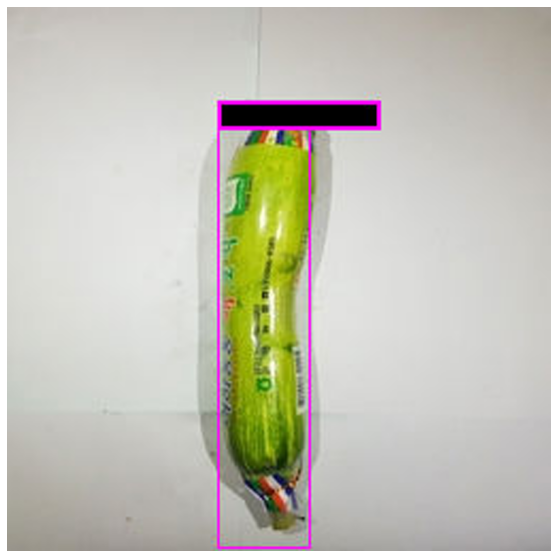

In [ ]:
!./darknet detector test zucchini_yolo/zucchini_yolo_data.data zucchini_yolo/zucchini-train-yolo.cfg backup/zucchini-train-yolo_final.weights data/20200630_165838.jpg -dont-show
imShow('predictions.jpg')